# YUN SOLUTIONS

> Designing program that analyzes MP3 file containing human voice and extracts the emotion from it

> Tipparthi Jaideep Chandra [210100162]




### AUDIO FILE

---



In [1]:
from IPython.display import Audio
audio_file = "male_exclamations-22868.mp3"
audio = Audio(audio_file)
display(audio)

## Method 1: Using OpenSMILE and Librosa
---

In [ ]:
pip install opensmile librosa

In [17]:
import opensmile
import librosa
import matplotlib.pyplot as plt

In [18]:
# Loading the speech signal
signal, sr = librosa.load('male_exclamations-22868.mp3')

In [ ]:
# Loading the feature extractor to extract the features using OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.Functionals
)

# Extracting
features = smile.process_signal(signal, sr)

In [ ]:
# Using Pre-Trained model for SER model in OpenSMILE Library

# Loading the pre-trained SER model
model = opensmile.MLModel(
    model_type=opensmile.MLModelType.Svm,
    filename='emo_large.conf'
)

label = model.predict(features)

In [ ]:
timestamps = smile.get_instance().get_output_timestamps(features)

# Plotting the emotion scores over time
emotions = model.predict_proba(features)  # Probabilities for each emotion label
emotions = emotions.T  # Transpose to have one row per emotion label
plt.figure()
plt.plot(timestamps, emotions[0], label='Neutral')
plt.plot(timestamps, emotions[1], label='Happy')
plt.plot(timestamps, emotions[2], label='Sad')
plt.plot(timestamps, emotions[3], label='Angry')
plt.plot(timestamps, emotions[4], label='Fearful')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Emotion score')

## Method 2: Short-Term-Energy Method
---

In [3]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from scipy.io import wavfile
from scipy.signal import find_peaks

In [5]:
# setting the path of the mp3 file
mp3_file = 'male_exclamations-22868.mp3'

# Loading audio file
audio = AudioSegment.from_mp3(mp3_file)

# setting the path to save the wav file
wav_file = "file.wav"

# exporting the audio in wav format
audio.export(wav_file, format="wav")

<_io.BufferedRandom name='file.wav'>

In [11]:
# extracting array of samples from audio and converting into a numpy array
audio_file = AudioSegment.from_file("file.wav")
audio = np.array(audio_file.get_array_of_samples()) 

# Sample rate
sample_rate, _ = wavfile.read('file.wav')
print(sample_rate)

24000


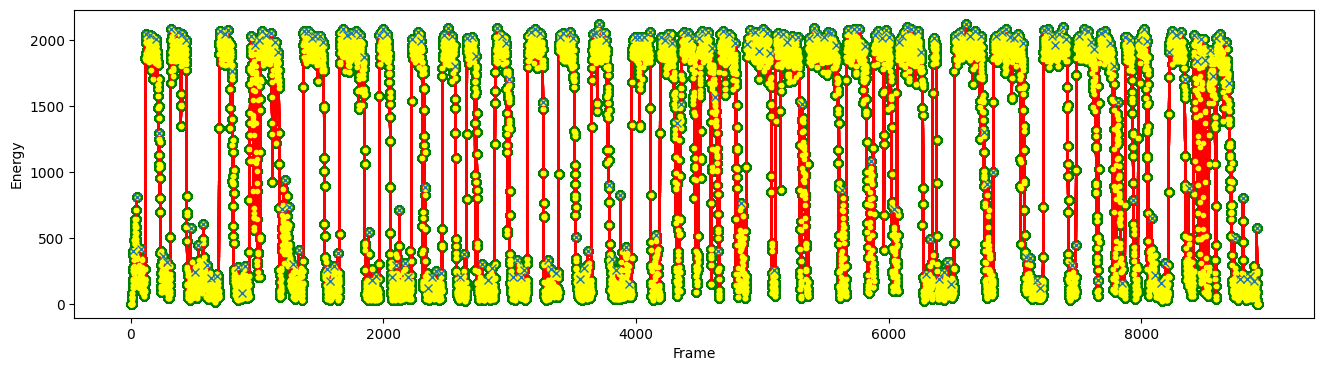


Overall Emotion of the audio: Happy


In [14]:
# Computing short-term energy
frame_length = int(0.02 * sample_rate)  # 20ms
energy = np.array([sum(abs(audio[i:i+frame_length]**2)) for i in range(0, len(audio), frame_length)])

# Finding peaks in energy
peaks, _ = find_peaks(energy, distance=int(0.5 * sample_rate / frame_length))

# Computing emotion score
if len(peaks) > 0:
    score = np.mean([energy[p] for p in peaks])
else:
    score = 0

# Plotting emotion with time/frames
plt.figure(figsize=(16, 4))
for i in peaks:
    avg_energy = np.mean([energy[j] for j in range(i,i+1)])/4000
    if avg_energy > 1000:                                 # HAPPY
        plt.plot(energy/4000,'o', color = 'green')
    elif avg_energy > 500:                                # SAD
        plt.plot(energy/4000,'.', color = 'yellow')
    else:                                                 # ANGRY
        plt.plot(energy/4000,'-', color = 'red')

plt.plot(peaks, energy[peaks]/4000, "x")
plt.xlabel("Frame")
plt.ylabel("Energy")
plt.show()

# Emotion score for entire time 
if score > 1000:
    print("\nOverall Emotion of the audio: Happy")
elif score>500:
    print("\nOverall Emotion of the audio: Sad")
else:
    print("\nOverall Emotion of the audio: Angry")